In [2]:
import pandas as pd
import pylab as plt

In [3]:
dta = [81.9,89.4,79.0,81.4,84.8,85.9,88.0,80.3,82.6,83.5,80.2,85.2,87.2,83.5,84.3,82.9,84.7,82.9,
       81.5,83.4,87.7,81.8,79.6,85.8,77.9,89.7,85.4,86.3,80.7,83.8,90.5,84.5,82.4,86.7,83.0,81.8,
       89.3,79.3,82.7,88.0,79.6,87.8,83.6,79.5,83.3,88.4,86.6,84.6,79.7,86.0,84.2,83.0,84.8,83.6,
       81.8,85.9,88.2,83.5,87.2,83.7,87.3,83.0,90.5,80.7,83.1,86.5,90.0,77.5,84.7,84.6,87.2,80.5,
       86.1,82.6,85.4,84.7,82.8,81.9,83.6,86.8,84.0,84.2,82.8,83.0,82.0,84.7,84.4,88.9,82.4,83.0,
       85.0,82.2,81.6,86.2,85.4,82.1,81.4,85.0,85.8,84.2,83.5,86.5,85.0,80.4,85.7,86.7,86.7,82.3,
       86.4,82.5,82.0,79.5,86.7,80.5,91.7,81.6,83.9,85.6,84.8,78.4,89.9,85.0,86.2,83.0,85.4,84.4,
       84.5,86.2,85.6,83.2,85.7,83.5,80.1,82.2,88.6,82.0,85.0,85.2,85.3,84.3,82.3,89.7,84.8,83.1,
       80.6,87.4,86.8,83.5,86.2,84.1,82.3,84.8,86.6,83.5,78.1,88.8,81.9,83.3,80.0,87.2,83.3,86.6,
       79.5,84.1,82.2,90.8,86.5,79.7,81.0,87.2,81.6,84.4,84.4,82.2,88.9,80.9,85.1,87.1,84.0]
data = pd.Series(dta,name='production record')

D:\Soft\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


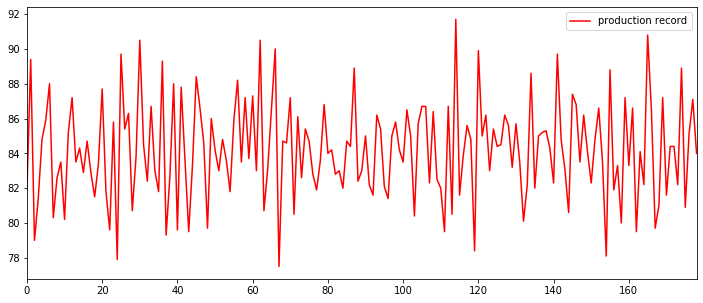

In [4]:
data.plot(figsize=[12,5],colors='r')
plt.legend()

In [5]:
from statsmodels.stats.diagnostic import unitroot_adf # 平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
print(unitroot_adf(data))
print("-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------")
print(acorr_ljungbox(data,lags=12))

(-11.308331963766253, 1.2570216564700971e-20, 2, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, 780.7160334607063)
-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------
(array([17.3067066 , 19.41298463, 19.93433657, 23.46996339, 25.79043194,
       29.48203332, 30.89763773, 32.37646241, 35.81156175, 36.53044881,
       36.56577407, 39.7312135 ]), array([3.18062320e-05, 6.08869122e-05, 1.75144924e-04, 1.01990690e-04,
       9.79862649e-05, 4.92995081e-05, 6.49354312e-05, 7.97333349e-05,
       4.28178071e-05, 6.82133455e-05, 1.36210295e-04, 7.96804491e-05]))


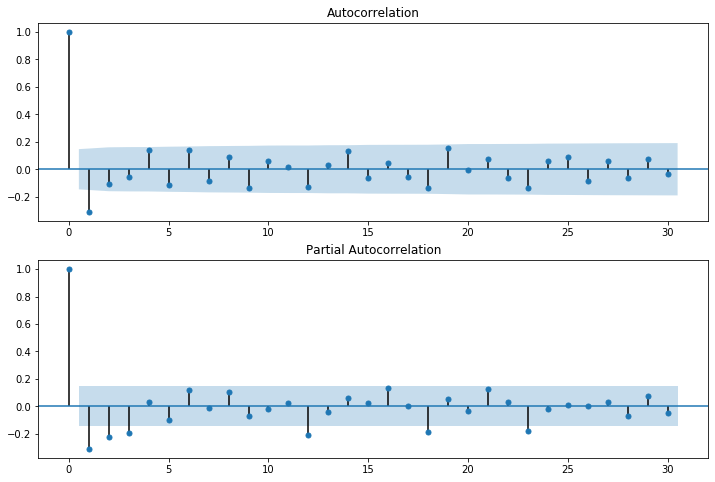

In [6]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(),lags=30,ax=ax1)
fig = sm.graphics.tsa.plot_pacf(data,lags=30,ax=ax2)

In [7]:
# 根据bic准则编写函数来推荐最优的模型：
def SelectModel(data):
    best_model = sm.tsa.ARMA(data,(0,0)).fit()
    for i in range(3):
        for j in range(3):
            arma_mod = sm.tsa.ARMA(data,(i,j)).fit()
            print('当p和q为，相应的bic值为：',i,j,arma_mod.bic)
            if best_model.bic > arma_mod.bic :
                best_model = arma_mod
    print('根据bic准则，选出最优的模型为：',best_model.summary2())
            
SelectModel(data)

当p和q为，相应的bic值为： 0 0 890.5982087504876
当p和q为，相应的bic值为： 0 1 866.864389799463
当p和q为，相应的bic值为： 0 2 870.2466913900466
当p和q为，相应的bic值为： 1 0 877.930458907893
当p和q为，相应的bic值为： 1 1 870.5911040056552
当p和q为，相应的bic值为： 1 2 875.3920490673744
当p和q为，相应的bic值为： 2 0 874.0094030431685
当p和q为，相应的bic值为： 2 1 874.7417336940694
当p和q为，相应的bic值为： 2 2 877.6302403490068
根据bic准则，选出最优的模型为：                              Results: ARMA
Model:                 ARMA               BIC:                  866.8644
Dependent Variable:    production record  Log-Likelihood:       -425.65 
Date:                  2019-11-13 17:32   Scale:                1.0000  
No. Observations:      179                Method:               css-mle 
Df Model:              2                  Sample:               0       
Df Residuals:          177                                      9       
Converged:             1.0000             S.D. of innovations:  2.607   
No. Iterations:        5.0000             HQIC:                 861.180 
AIC:           

In [8]:
arma_mod = sm.tsa.ARMA(data,(1,0)).fit()
arma_mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: ARMA
========================================================================
Model:                 ARMA               BIC:                  877.9305
Dependent Variable:    production record  Log-Likelihood:       -431.18 
Date:                  2019-11-13 17:32   Scale:                1.0000  
No. Observations:      179                Method:               css-mle 
Df Model:              2                  Sample:               0       
Df Residuals:          177                                      9       
Converged:             1.0000             S.D. of innovations:  2.690   
No. Iterations:        4.0000             HQIC:                 872.246 
AIC:                   868.3683                                         
------------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
const                   84.2072   0.1540 546.9505 0.0000 83.9055 84.5090
ar.L1.production record -0.3078   0.0710  -4.3363 0.0000 -0.4469 -0.1687
----------------------------------------------------------------------------------
                   Real            Imaginary           Modulus           Frequency
----------------------------------------------------------------------------------
AR.1             -3.2489              0.0000            3.2489              0.5000
========================================================================

"""

In [10]:
arma_mod.forecast(1) #返回期1天的预测，返回预测结果、标准误差、置信区间

(array([84.27099685]),
 array([2.69024819]),
 array([[78.99820729, 89.54378641]]))